In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [3]:
def load_data():
    diabetes = datasets.load_diabetes()
    return train_test_split(diabetes.data,diabetes.target,
                            test_size=0.25,random_state=0)

## Linear Regression

In [4]:
def test_LinearRegression(*data):
    # param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    
    X_train,X_test,y_train,y_test=data
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
    print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))
    print('Score: %.2f' % regr.score(X_test, y_test))

In [5]:
X_train,X_test,y_train,y_test = load_data()
test_LinearRegression(X_train,X_test,y_train,y_test)

Coefficients:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], intercept 153.07
Residual sum of squares: 3180.20
Score: 0.36


## Ridge L2

In [6]:
def test_Ridge_alpha(*data):
    # alpha越大，正则化越大
    
    X_train,X_test,y_train,y_test = data
    alphas=[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores=[]
    
    for i,alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Ridge")
    plt.show()

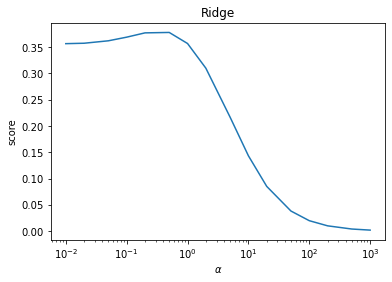

In [7]:
X_train,X_test,y_train,y_test = load_data()
test_Ridge_alpha(X_train,X_test,y_train,y_test)

## Lasso L1

In [8]:
def test_Lasso_alpha(*data):
    # alpha越大，正则化越大
    
    X_train,X_test,y_train,y_test = data
    alphas=[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores=[]
    for i,alpha in enumerate(alphas):
        regr = linear_model.Lasso(alpha = alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Lasso")
    plt.show()

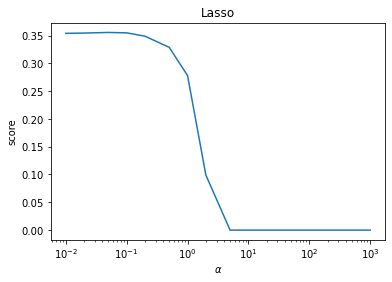

In [9]:
X_train,X_test,y_train,y_test = load_data()
test_Lasso_alpha(X_train,X_test,y_train,y_test)

## Elastic Net

In [12]:
def test_ElasticNet_alpha_rho(*data):
    # alpha 和 l1_ratio 的影响

    X_train,X_test,y_train,y_test = data
    alphas=np.logspace(-2,2); rhos=np.linspace(0.01,1)
    scores=[]
    for alpha in alphas:
            for rho in rhos:
                regr = linear_model.ElasticNet(alpha=alpha,l1_ratio=rho)
                regr.fit(X_train, y_train)
                scores.append(regr.score(X_test, y_test))
    ## 绘图
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    
    alphas, rhos = np.meshgrid(alphas, rhos)
    scores=np.array(scores).reshape(alphas.shape)
    fig=plt.figure()
    ax=Axes3D(fig)
    surf = ax.plot_surface(alphas, rhos, scores, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\rho$")
    ax.set_zlabel("score")
    ax.set_title("ElasticNet")
    plt.show()
    
# alpha影响的是整个正则化的比例，而l1_ratio影响的是l1和l2的比例
# alpha >= 0, 1 >= rho >= 0

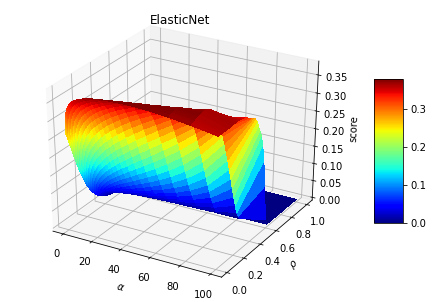

In [13]:
X_train,X_test,y_train,y_test = load_data()
test_ElasticNet_alpha_rho(X_train,X_test,y_train,y_test)

## Logistic Regression

In [44]:
def load_data_iris():
    iris=datasets.load_iris() # 使用 scikit-learn 自带的 iris 数据集
    X_train=iris.data
    y_train=iris.target
    return train_test_split(X_train, y_train,test_size=0.25,
                            random_state=0,stratify=y_train)

In [45]:
def test_LogisticRegression_C(*data):
    # C是正则化系数的倒数，它越小则正则化系数越大
    
    X_train,X_test,y_train,y_test = data
    Cs=np.logspace(-2,2,num=20)
    scores=[]
    for C in Cs:
        regr = linear_model.LogisticRegression(C=C,max_iter=1000)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,scores)
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LogisticRegression")
    plt.show()

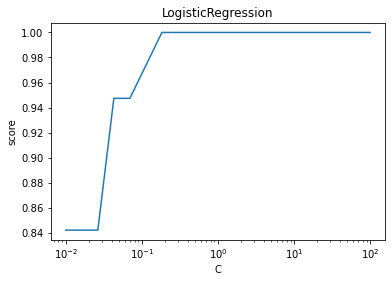

In [49]:
X_train,X_test,y_train,y_test = load_data_iris()
test_LogisticRegression_C(X_train,X_test,y_train,y_test)

In [50]:
def test_LogisticRegression_multinomial(*data):
    # solver必须为牛顿法或者拟牛顿法
    
    X_train,X_test,y_train,y_test = data
    regr = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=1000)
    regr.fit(X_train, y_train)
    print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))

In [51]:
test_LogisticRegression_multinomial(X_train,X_test,y_train,y_test)

Coefficients:[[-0.38353784  0.86206884 -2.26986885 -0.97491812]
 [ 0.3438595  -0.37902472 -0.03125829 -0.86830975]
 [ 0.03967833 -0.48304412  2.30112714  1.84322788]], intercept [  8.75858272   2.49383019 -11.2524129 ]
Score: 1.00


## LDA

In [56]:
from sklearn import datasets, discriminant_analysis

In [57]:
def test_LinearDiscriminantAnalysis_shrinkage(*data):
# shrinkage 相当于引入抖动，随着增大，准确率下降
    X_train,X_test,y_train,y_test = data
    shrinkages=np.linspace(0.0,1.0,num=20)
    scores=[]
    for shrinkage in shrinkages:
        lda = discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr',
                                                                shrinkage=shrinkage)
        lda.fit(X_train, y_train)
        scores.append(lda.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(shrinkages,scores)
    ax.set_xlabel(r"shrinkage")
    ax.set_ylabel(r"score")
    ax.set_ylim(0,1.05)
    ax.set_title("LinearDiscriminantAnalysis")
    plt.show()

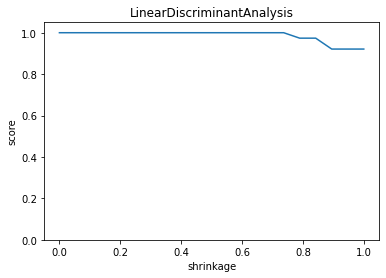

In [58]:
X_train,X_test,y_train,y_test=load_data()
test_LinearDiscriminantAnalysis_shrinkage(X_train,X_test,y_train,y_test)

In [64]:
def plot_LDA(converted_X,y):
    '''
    绘制经过 LDA 转换后的数据

    :param converted_X: 经过 LDA转换后的样本集
    :param y: 样本集的标记
    '''
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure()
    ax=Axes3D(fig)
    colors='rgb'
    markers='o*s'
    for target,color,marker in zip([0,1,2],colors,markers):
        pos=(y==target).ravel()
        X=converted_X[pos,:]
        ax.scatter(X[:,0], X[:,1], X[:,2],color=color,marker=marker,
                    label="Label %d"%target)
    ax.legend(loc="best")
    fig.suptitle("Iris After LDA")
    plt.show()
    
def run_plot_LDA(*data):

    X_train,X_test,y_train,y_test = data
    X=np.vstack((X_train,X_test))
    Y=np.vstack((y_train.reshape(y_train.size,1),y_test.reshape(y_test.size,1))).ravel()
    lda = discriminant_analysis.LinearDiscriminantAnalysis()
    lda.fit(X, Y)
    converted_X=np.dot(X,np.transpose(lda.coef_))+lda.intercept_
    plot_LDA(converted_X,Y)

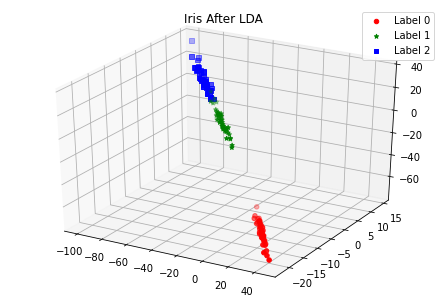

In [65]:
X_train,X_test,y_train,y_test=load_data()
run_plot_LDA(X_train,X_test,y_train,y_test)